In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

In [5]:
df['math score'].nunique()

81

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

In [7]:
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [8]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
pca_2d

array([[ -8.48837536,   1.26411978],
       [-25.46144129, -13.73117695],
       [-43.12175323,  -0.35950596],
       ...,
       [  4.75467372,  -5.15605377],
       [-11.46651782,  -5.47790938],
       [-26.47680822,  -4.83322812]])

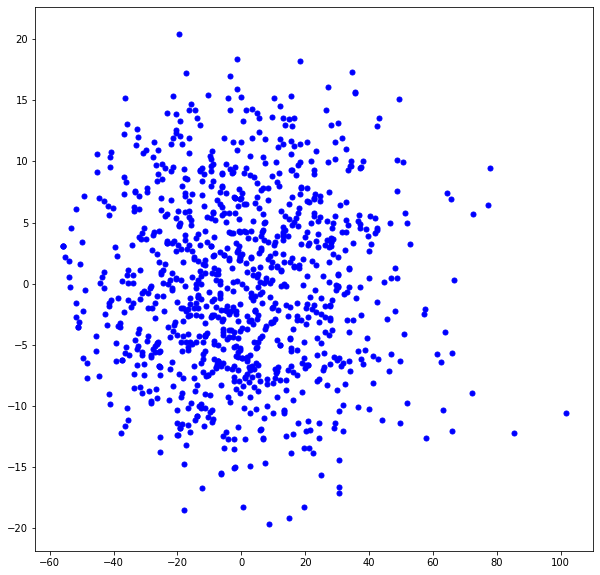

In [13]:
import matplotlib.pyplot as pl
pl.figure(figsize=(10,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='.')
pl.show()
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
X =df.iloc[:, [5,6,7]].values

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X.shape

(1000, 3)

In [5]:
import scipy.cluster.hierarchy as sch

C:\Users\Prasad\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Prasad\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


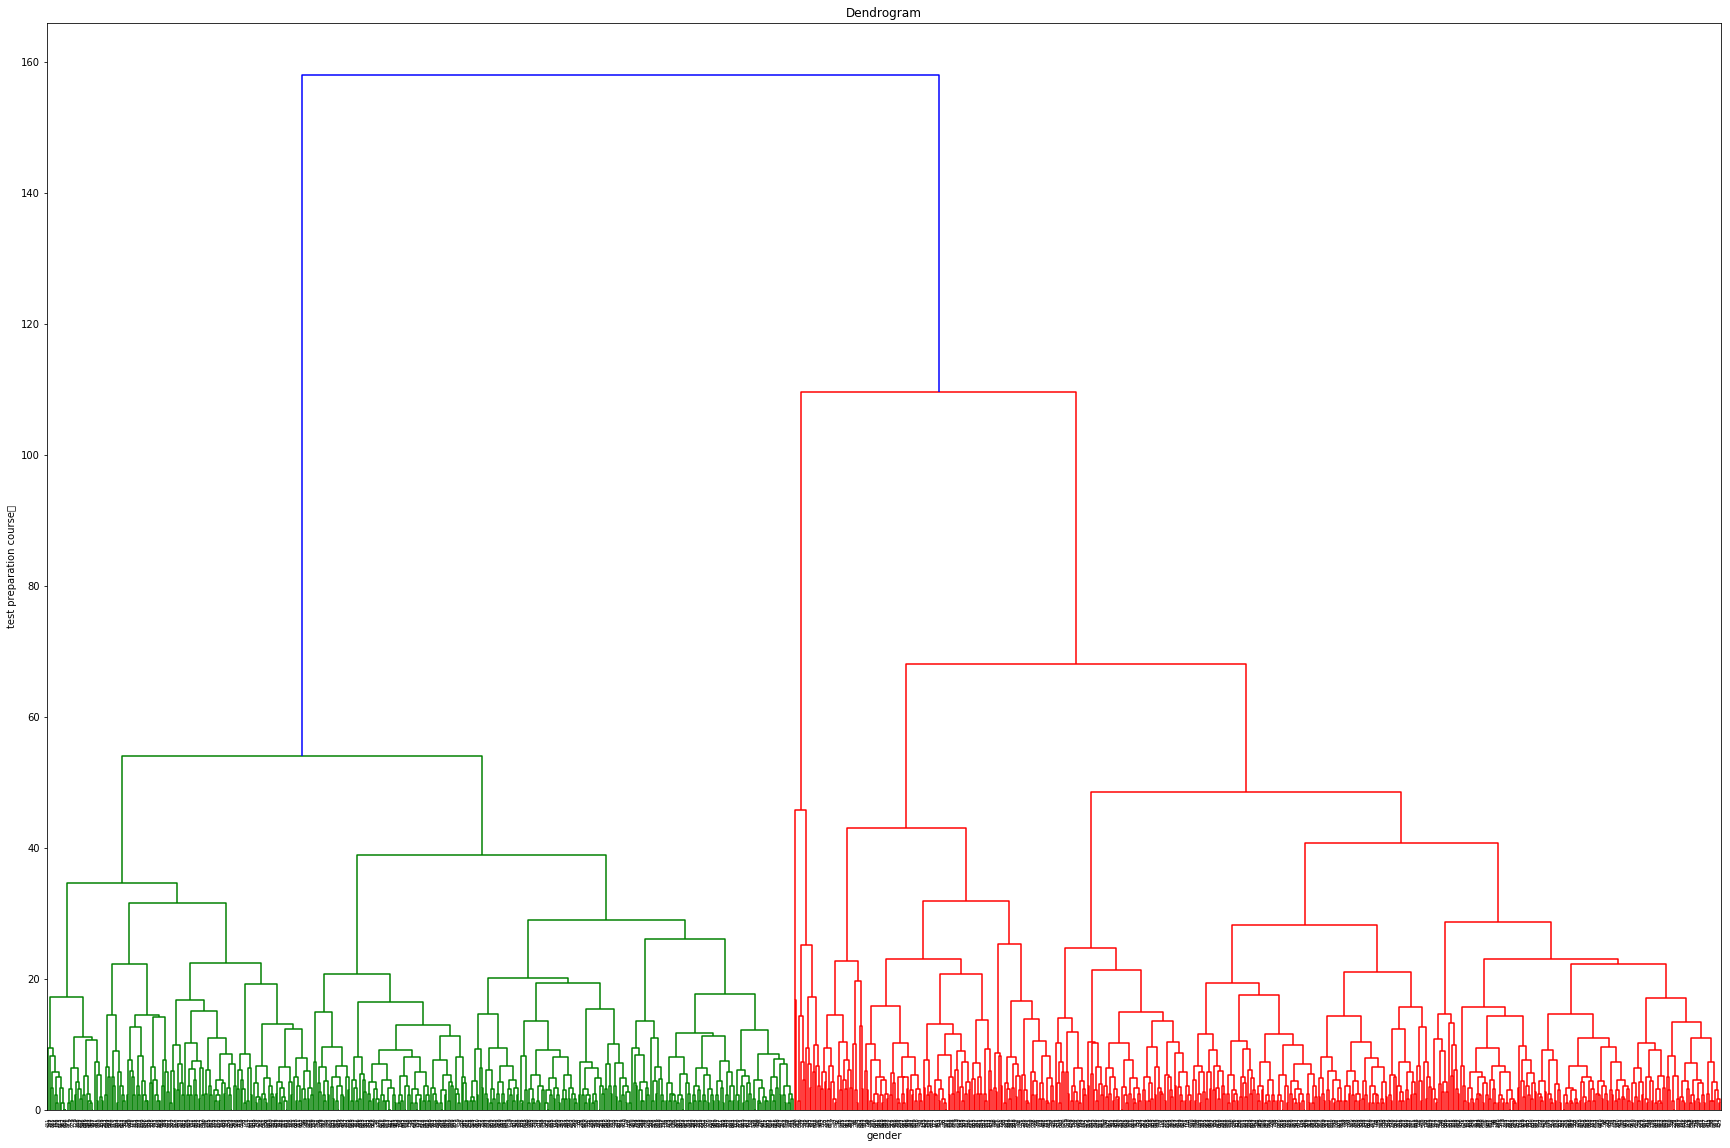

In [6]:
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('gender')
plt.ylabel('test preparation course	')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')

In [8]:
y_hc=hc.fit_predict(X)

In [9]:
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [10]:
y_hc

array([3, 4, 4, 1, 3, 3, 4, 1, 2, 5, 1, 1, 3, 3, 1, 3, 4, 0, 1, 5, 2, 3,
       5, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 4, 3, 3, 5, 4, 2, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 3, 1, 2, 1, 3, 3, 1, 4, 1, 2, 0, 3, 1, 2, 3, 2, 2,
       1, 2, 2, 5, 2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 1, 1, 1, 2, 1, 3, 4, 3,
       2, 3, 2, 0, 3, 1, 4, 3, 2, 2, 2, 2, 2, 3, 4, 1, 4, 2, 4, 2, 2, 2,
       4, 2, 1, 5, 4, 3, 3, 3, 5, 2, 4, 4, 4, 2, 3, 4, 2, 3, 3, 1, 4, 1,
       3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 5, 1, 3, 0, 4, 2, 3, 4, 2, 2, 2, 1,
       2, 4, 3, 2, 3, 2, 3, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 4, 4, 2, 5, 4,
       5, 3, 2, 4, 2, 5, 1, 2, 1, 2, 3, 2, 1, 4, 2, 3, 2, 2, 3, 2, 2, 1,
       5, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 0, 5, 1, 4, 3, 4, 1, 3, 2,
       2, 4, 2, 3, 2, 5, 3, 1, 2, 4, 2, 1, 3, 4, 3, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 4,
       3, 1, 3, 3, 4, 3, 2, 1, 5, 2, 4, 3, 4, 2, 3, 2, 1, 1, 3, 3, 1, 3,
       4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 1, 4, 3,

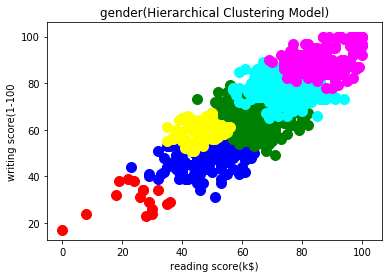

In [11]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100,c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_hc==5, 0], X[y_hc==5, 1], s=100, c='yellow', label ='Cluster 6')
plt.title('gender(Hierarchical Clustering Model)')
plt.xlabel('reading score(k$)')
plt.ylabel('writing score(1-100')
plt.show()

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.drop(['race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
Ib_make = LabelEncoder()
df['gender']= Ib_make.fit_transform(df['gender'])

In [5]:
df.columns

Index(['gender', 'math score', 'reading score', 'writing score'], dtype='object')

In [6]:
x =df[['math score','reading score','writing score']].values
y =df[['gender']].values

Text(0.5, 1.0, '2d Diagram')

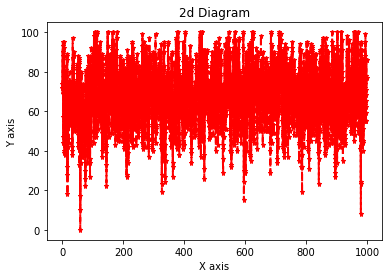

In [7]:

plt.plot(x,'r*',linestyle='dashed',linewidth=2, markersize=5)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2d Diagram')

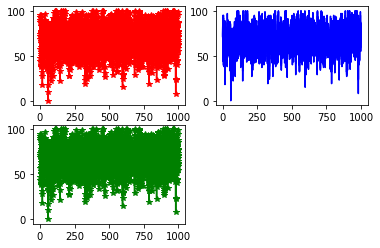

In [8]:
plt.subplot(2,2,1)
plt.plot(x,'r*-')
plt.subplot(2,2,2)
plt.plot(x,'b-')
plt.subplot(2,2,3)
plt.plot(x,'g*-')